In [4]:
import numpy as np
import pylab as p
from time import time 

def kuta4(t,x0):
    N = len(t)
    h = (t[-1]-t[0])/N
    x = np.zeros(N)
    x[0] = x0
    for i in range(N-1):
        k1 = h*f(x[i],t[i])
        k2 = h*f(x[i] + k1/2,t[i] + h/2)
        k3 = h*f(x[i] + k2/2,t[i] + h/2)
        k4 = h*f(x[i] + k3,t[i] + h)
        x[i+1]= x[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return x
    

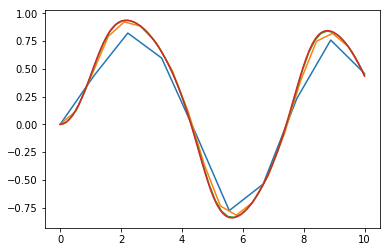

In [2]:
def f(x,t):
    return -x**3 + np.sin(t)
for N in [10,20,50,100]:
    t = np.linspace(0,10,N)
    x0 = 0
    p.plot(t,kuta4(t,x0))
p.show()

In [3]:
def vec_kuta4(t,x0):
    N = len(t)
    h = (t[-1]-t[0])/N
    x = np.zeros( (N,len(x0) ),float)
    x[0] = np.copy(x0)
    for i in range(N-1):
        k1 = np.copy(h*f(x[i],t[i]))
        k2 = np.copy(h*f(x[i] + k1/2,t[i] + h/2))
        k3 = np.copy(h*f(x[i] + k2/2,t[i] + h/2)) 
        k4 = np.copy(h*f(x[i] + k3,t[i] + h))
        x[i+1]= np.copy(x[i] + (k1 + 2*k2 + 2*k3 + k4)/6)
    return x


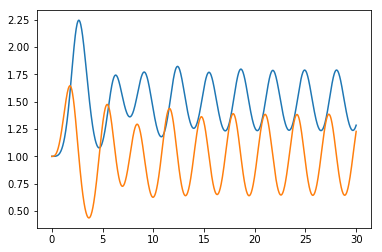

In [4]:
def f(x,t):
    r = x[0]
    y = x[1]
    fx = r*y-r
    fy = y - r*y + (np.sin(t))**2
    return np.array([fx,fy],float)

t = np.linspace(0,30,1000,float)
x0 = np.ones(2,float)
p.plot(t,vec_kuta4(t,x0)[:,0])
p.plot(t,vec_kuta4(t,x0)[:,1])
p.show()

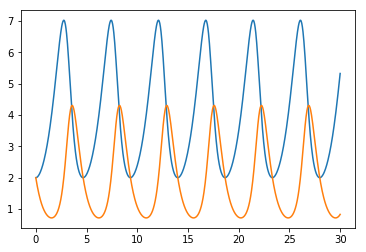

In [5]:
def f(r,t):
    x = r[0]
    y = r[1]
    fx = x - 0.5*x*y
    fy = 0.5*x*y - 2*y
    return np.array([fx,fy], float)
t = np.linspace(0,30,1000)
x0 = np.ones(2,float)*2
p.plot(t,vec_kuta4(t,x0)[:,0])
p.plot(t,vec_kuta4(t,x0)[:,1])
p.show()

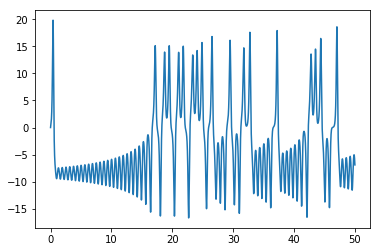

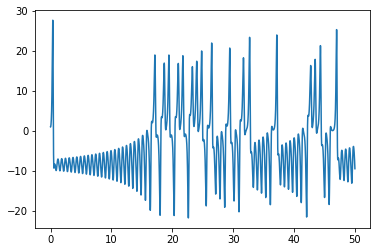

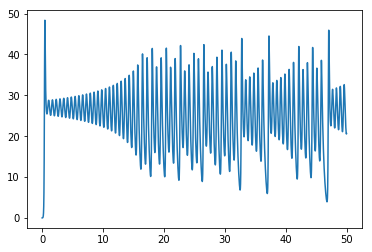

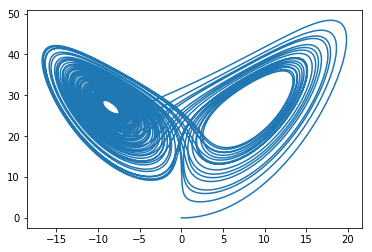

In [6]:
def f(r,t):
    x = r[0]
    y = r[1]
    z = r[2]
    return np.array([10*(y-x), 28*x-y-x*z , x*y-8*z/3 ],float)
t = np.linspace(0,50,10000)
x0 = np.array([0,1,0])
r = vec_kuta4(t,x0)
for i in range(3):
    p.plot(t,r[:,i])
    p.show()
p.plot(r[:,0],r[:,2])
p.show()

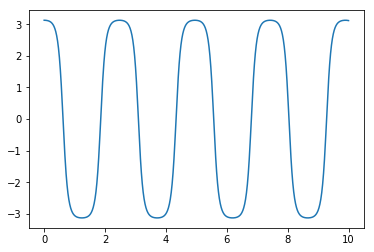

In [7]:
def f(r,t):
    g = 9.81
    l= 0.1
    fx = r[1]
    fy = -g*np.sin(r[0])/l
    return np.array([fx,fy],float)
t = np.linspace(0,10,1000)
x0 = np.array([179*np.pi/180,0])
p.plot(t,vec_kuta4(t,x0)[:,0])
p.show()

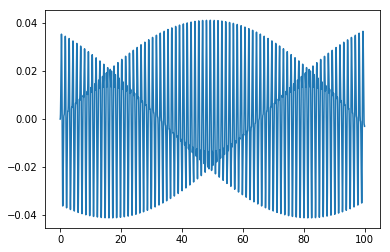

In [8]:
def f(r,t):
    g,l = 9.81,0.1
    C,k = 2,5
    fx = r[1]
    fy = -g*np.sin(r[0])/l + C*np.cos(r[0])*np.sin(k*t)
    return np.array([fx,fy],float)
t = np.linspace(0,100,10000)
x0 = np.zeros(2,float)
p.plot(t,vec_kuta4(t,x0)[:,0])
p.show()

# Método adaptativo 

In [14]:
def kuta_aux(t,x,h):
    k1 = h*f(x,t)
    k2 = h*f(x + k1/2,t + h/2)
    k3 = h*f(x + k2/2,t + h/2)
    k4 = h*f(x + k3,t + h)
    return x + (k1 + 2*k2 + 2*k3 + k4)/6
    

def adapt_kuta(x0,a,b,e,h):
    h1 = h
    temp = [a]
    x =[x0]
    t = a
    while t < b:
        x1 = x0
        x2 = kuta_aux(t,x1,2*h1)
        for j in range(2):
            x1 = kuta_aux(t + j*h1,x1,h1)
        rho = 30*h1*e/(np.abs(x1-x2))
        if rho > 1.:
            x0 = x1
            t += 2*h1
            temp.append(t)
            x.append(x1)
        h1 = min(h1*rho**0.25,2*h1)
    return np.array([temp,x],float)

def adapt_kuta1(x0,a,b,e,h):
    h1 = h 
    temp = np.zeros(300000)
    x =np.zeros(300000)
    temp[0] = a
    x[0]= x0
    t = a
    i = 0
    while t < b:
        x1 = x0
        x2 = kuta_aux(t,x1,2*h1)
        for j in range(2):
            x1 = kuta_aux(t + j*h1,x1,h1)
        rho = 30*h1*e/(np.abs(x1-x2))
        
        if rho > 1.:
            x0 = x1
            i += 1
            t += 2*h1
            temp[i] = t
            x[i] = x1
        h1 = min(h1*rho**0.25,2*h1)
        
    return np.array([temp[:i+1],x[:i+1]],float)

tamanho de t sem adpt:  1000
tamanho de x sem adpt:  1000
tempo sem adpt:  0.025803089141845703 

tamanho de t com adpt append:  72
tamanho de x com adpt append:  72
tempo com adpt append:  0.0035889148712158203 

tamanho de t com adpt array:  72
tamanho de x com adpt array:  72
tempo com adpt array:  0.0055811405181884766 



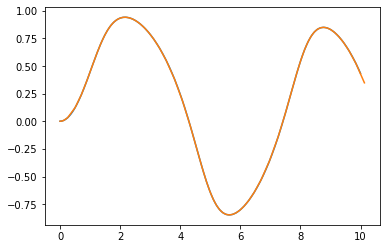

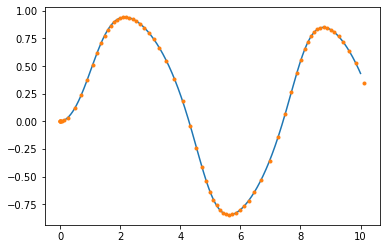

In [18]:
def f(x,t):
    return -x**3 + np.sin(t)
e = 1e-6
h = 10**(-3)
t1 = time()
t = np.linspace(0,10,1000)
x0 = 0
x = kuta4(t,x0)
p.plot(t,x)
t2 = time()
print('tamanho de t sem adpt: ', len(t))
print('tamanho de x sem adpt: ', len(x))
print('tempo sem adpt: ', t2-t1,'\n')

t1 = time()
data=adapt_kuta(0,0,10,e,h)
t = data[0]
x = data[1]
#p.plot(t,x)
t2 = time()
print('tamanho de t com adpt append: ', len(t))
print('tamanho de x com adpt append: ', len(x))
print('tempo com adpt append: ', t2-t1,'\n')

t1 = time()
data=adapt_kuta1(0,0,10,e,h)
t = data[0]
x = data[1]
p.plot(t,x)
t2 = time()
print('tamanho de t com adpt array: ', len(t))
print('tamanho de x com adpt array: ', len(x))
print('tempo com adpt array: ', t2-t1,'\n')
p.show()

t = np.linspace(0,10,1000)
x0 = 0
x = kuta4(t,x0)
p.plot(t,x)
data=adapt_kuta(0,0,10,e,h)
t = data[0]
x = data[1]
p.plot(t,x,'.')
p.show()

In [12]:
def vec_adapt_kuta(x0,a,b,e,h):
    h1 = h
    temp = [a]
    x =[float(x0[0])]
    r = np.copy(x0)
    t = a
    while t < b:
        x1 = np.copy(r)
        x2 = np.copy(kuta_aux(t,x1,2*h1))
        for j in range(2):
            x1 = np.copy(kuta_aux(t + j*h1,x1,h1))
        rho = 30*h1*e/(np.abs(x1[0]-x2[0]))
        if rho > 1.:
            r = np.copy(x1)
            t += 2*h1
            temp.append(t)
            x.append(x1[0])
        h1 = min(h1*rho**0.25,2*h1)
    return np.array([temp,x],float)

def vec_adapt_kuta1(x0,a,b,e,h):
    h1 = h
    N = 30000
    temp = np.zeros(N)
    x = np.zeros(N)
    temp[0] = a
    x[0] = float(x0[0])
    r = np.copy(x0)
    t = a
    i = 0
    s = 1
    while t < b:
        x1 = np.copy(r)
        x2 = np.copy(kuta_aux(t,x1,2*h1))
        for j in range(2):
            x1 = np.copy(kuta_aux(t + j*h1,x1,h1))
        rho = 30*h1*e/(np.abs(x1[0]-x2[0]))
        if rho > 1.:
            i += 1
            r = np.copy(x1)
            t += 2*h1
            temp[i] = t
            x[i] = x1[0]
        h1 = min(h1*rho**0.25,2*h1)
        s = min(s,h1)
    print(s)
    return np.array([temp[:i+1],x[:i+1]],float)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


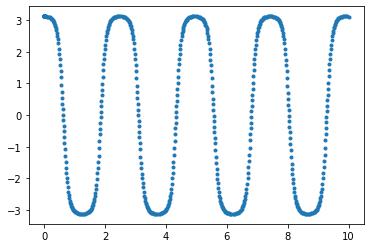

In [13]:
def f(r,t):
    g,l = 9.81,0.1
    C,k = 2,5
    fx = r[1]
    fy = -g*np.sin(r[0])/l
    return np.array([fx,fy],float)
e = 10**(-6)
h = 10**(-6)
N = 10
x0 = np.array([179*np.pi/180,0],float)
data = vec_adapt_kuta(x0,0,N,e,h)
t = data[0]
x = data[1]
p.plot(t,x,'.')
p.show()

tamanho t sem adpt:  50000
tempo sem adpt:  2.989093065261841 

tamanho t com adpt append:  2652
tempo com adpt append:  0.7438809871673584 

2e-06
tamanho t com adpt array:  2652
tempo com adpt array:  0.7614009380340576 



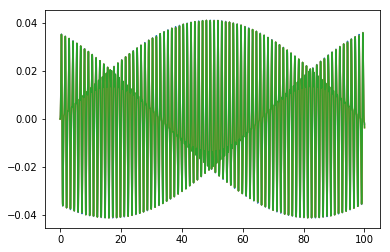

In [13]:
def f(r,t):
    g,l = 9.81,0.1
    C,k = 2,5
    fx = r[1]
    fy = -g*np.sin(r[0])/l + C*np.cos(r[0])*np.sin(k*t)
    return np.array([fx,fy],float)

e = 10**(-6)
h = 10**(-6)
N = 100
t1 = time()
t = np.arange(0,N,2e-3)
x0 = np.zer
os(2,float)
p.plot(t,vec_kuta4(t,x0)[:,0])
t2 = time()
print('tamanho t sem adpt: ', len(t))
print('tempo sem adpt: ', t2-t1, '\n')
t1 = time()
data = vec_adapt_kuta(0,0,N,e,h)
t = data[0]
x = data[1]
p.plot(t,x)
t2 = time()
print('tamanho t com adpt append: ', len(t))
print('tempo com adpt append: ', t2-t1, '\n')

t1 = time()
data = vec_adapt_kuta1(0,0,N,e,h)
t = data[0]
x = data[1]
p.plot(t,x)
t2 = time()
print('tamanho t com adpt array: ', len(t))
print('tempo com adpt array: ', t2-t1, '\n')
p.show()

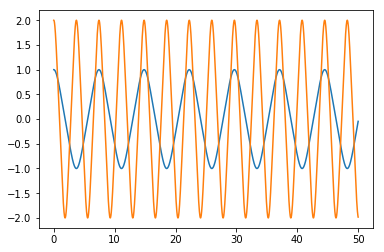

In [14]:
def f(r,t):
    w =1
    fx = r[1]
    fy = -w**2*r[0]**3
    return np.array([fx,fy],float)
t = np.linspace(0,50,10000)
x1 = np.array([1,0],float)
x2 = np.array([2,0],float)
p.plot(t,vec_kuta4(t,x1)[:,0])
p.plot(t,vec_kuta4(t,x2)[:,0])
p.show()

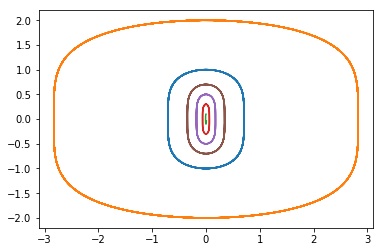

In [15]:
for i in [x1,x2,[0.1,0],[0.3,0],[0.5,0],[0.7,0]]:
    x = vec_kuta4(t,i)[:,0]
    y = vec_kuta4(t,i)[:,1]
    p.plot(y,x)
p.show()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


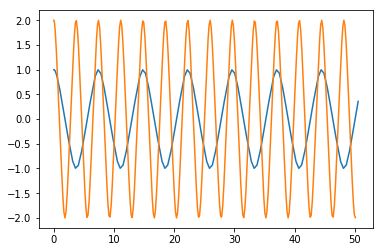

In [16]:
e = 10**(-4)
h = 0.001
for i in [1,2]:
    data = vec_adapt_kuta(i,0,50,e,h)
    p.plot(data[0],data[1])
p.show()

In [17]:
def vec_kuta4f(t,x0,u):
    N = len(t)
    h = (t[-1]-t[0])/N
    x = np.zeros( (N,len(x0) ),float)
    x[0] = np.copy(x0)
    for i in range(N-1):
        k1 = np.copy(h*f(x[i],t[i],u))
        k2 = np.copy(h*f(x[i] + k1/2,t[i] + h/2,u))
        k3 = np.copy(h*f(x[i] + k2/2,t[i] + h/2,u)) 
        k4 = np.copy(h*f(x[i] + k3,t[i] + h,u))
        x[i+1]= np.copy(x[i] + (k1 + 2*k2 + 2*k3 + k4)/6)
    return x

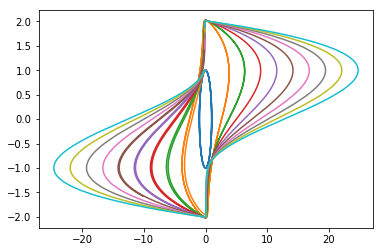

In [18]:
def f(r,t,u):
    fx = r[1]
    fy = u*(1-r[0]**2)*r[1] - r[0]
    return np.array([fx,fy],float)

t = np.linspace(0,20,10000)
x1 = np.array([1,0],float)
for i in np.arange(0,20,2):
    data = vec_kuta4f(t,x1,i)
    p.plot(data[:,1],data[:,0])
p.show()

In [19]:
def adapt_kuta(x0,a,b,e,h):
    h1 = h
    temp = [a]
    x =[x0]
    t = a
    x1 = x0
    while t < b:
        x0 = x1
        x2 = kuta_aux(t,x1,2*h1)
        for j in range(2):
            x1 = kuta_aux(t + j*h1,x1,h1)
        rho = 30*h1*e/(np.abs(x1-x2))
        if rho > 1.:
            t += 2*h1
            temp.append(t)
            x.append(x1)
            h1 = min(h1*rho**0.25,2*h1)
        else:
            x1 = x0
            h1 = min(h1*rho**0.25,2*h1)
            for j in range(2):
                x1 = kuta_aux(t + j*h1,x1,h1)
            t += 2*h1
            temp.append(t)
            x.append(x1)
        
    return np.array([temp,x],float)

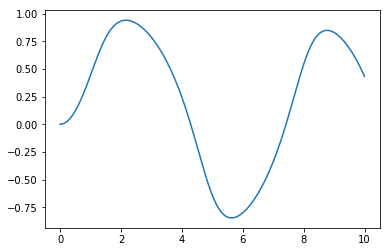

In [20]:
def f(x,t):
    return -x**3 + np.sin(t)

t = np.linspace(0,10,100000)
x0 =  0
data = kuta4(t,x0)
p.plot(t,data)
p.show()

In [72]:
def frog(r0,t,j = 1):
    N = len(t)
    h = j*(t[-1]-t[0])/N
    r = np.zeros((N,len(r0)),float)
    aux = np.zeros((N,len(r0)),float)
    r[min(j,0)] = np.copy(r0)
    aux[min(j,0)] = np.copy(r0 + 0.5*h*f(r0,t[0]))
    
    for i in range(j*min(0,j)*(N-1), max(0,j)*(N-1), j):
        
        r[i+j] = r[i] + h*f(aux[i],t[i] + 1/2*h)
        aux[i+j] = aux[i] + h*f(r[(i+j)], t[i] + h)
    return r 
        
    

[ 3.11691455 -0.16783528]


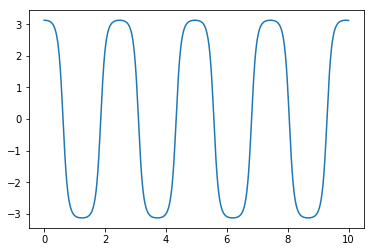

In [73]:
def f(r,t):
    g,l = 9.81,0.1
    C,k = 2,5
    fx = r[1]
    fy = -g*np.sin(r[0])/l
    return np.array([fx,fy],float)

t = np.linspace(0,10,1000)
r0 = np.array([179/180*np.pi,0],float)
data = frog(r0,t)
print(data[-1])
p.plot(t,data[:,0])
p.show()


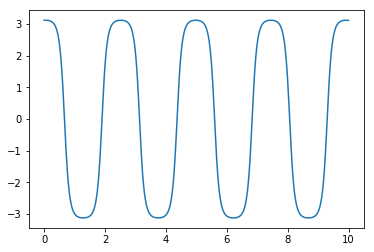

In [74]:
m0 = data[-1]
data2 = frog(m0,t,-1)
p.plot(t,data2[:,0])
p.show()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


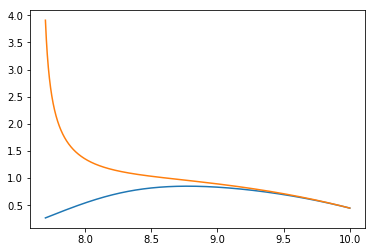

In [88]:
def f(x,t):
    return -x**3 + np.sin(t)
n = 7700
t = np.linspace(0,10,10000)
x0 =  np.array([0],float)
data = frog(x0,t)
p.plot(t[n:],data[n:])
data2 = frog(data[-1],t,-1)
p.plot(t[n:],data2[n:])
p.show()

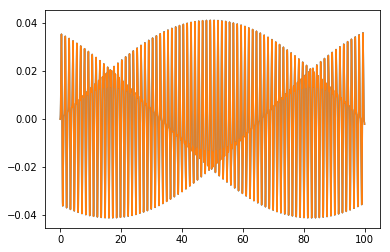

In [94]:
def f(r,t):
    g,l = 9.81,0.1
    C,k = 2,5
    fx = r[1]
    fy = -g*np.sin(r[0])/l + C*np.cos(r[0])*np.sin(k*t)
    return np.array([fx,fy],float)

t = np.linspace(0,100,100000)
x0 = np.zeros(2,float)
data = frog(x0,t)
p.plot(t,data[:,0])
data2 = frog(data[-1],t,-1)
p.plot(t,data2[:,0])
p.show()